In [ ]:
import pandas as pd
df = pd.read_csv("/content/skin_health_dataset.csv")

In [ ]:
df

,Sleep_Hours,Sun_Protection,Balanced_Diet_Score,Exercise_Hours,Stress_Level,Skin_Category
0,7.74507123,High,4.518698154,5.038693028,4.744164817,Glowing
1,6.792603548,Medium,6.213158896,7.065477826,3.088919119,Glowing
2,7.971532807,8.805588622,7.762468197,3.782479703,1.787107359,Glowing
3,9.284544785,0,8.664387985,15,5.406927272,Glowing
4,6.648769938,7.173714188,3.499258982,5.380287983,3.487298509,Glowing
...,...,...,...,...,...,...
115,7.452321014,7.267838045,3.993676588,3.501927921,3.979967202,Aging
116,6.947932345,1.949714827,6.45371716,Olosh,4.460250129,Aging
117,5.246982944,6.37290863,5.778353403,4.622500309,3.042472568,Aging
118,8.714234222,4.67642707,7.306796401,10.15776162,4.11141348,Glowing


In [ ]:
# identify the rows where values of a column are categorical instead of numeric and print the rows number
df[pd.to_numeric(df['Sleep_Hours'], errors='coerce').isnull()]


,Sleep_Hours,Sun_Protection,Balanced_Diet_Score,Exercise_Hours,Stress_Level,Skin_Category
23,Ghumay na,6.369267717,3.939030897,2.948489957,6.125938473,Aging
53,jani nah,6.68230395,8.624005243,6.555353644,2.5779676,Glowing
71,//???????//,7.712797589,9.24694213,0,4.688645529,Glowing


In [ ]:
# Convert to numeric — invalid strings will become NaN
df['Sleep_Hours'] = pd.to_numeric(df['Sleep_Hours'], errors='coerce')
# Now compute mean and max, ignoring NaN
mean_sleep = df['Sleep_Hours'].mean()
max_sleep = df['Sleep_Hours'].max()

print("Mean sleep hours:", mean_sleep)
print("Max sleep hours:", max_sleep)


Mean sleep hours: 6.762911347931624
Max sleep hours: 10.0


In [ ]:
# Replace NaN values with the mean
df['Sleep_Hours'].fillna(mean_sleep, inplace=True)

/tmp/ipython-input-1857636611.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep_Hours'].fillna(mean_sleep, inplace=True)


In [ ]:
import pandas as pd
import numpy as np

def process_column(df, column_name):
    """
    Process a column that may contain both numeric and categorical data.
    - Identifies non-numeric rows
    - Prints their row indices
    - Computes mean and max of numeric values
    - Replaces non-numeric (NaN) values with mean

    Returns the updated dataframe and prints key stats.
    """
    # Identify rows with non-numeric values
    non_numeric_mask = pd.to_numeric(df[column_name], errors='coerce').isnull()
    non_numeric_rows = df[non_numeric_mask]

    if not non_numeric_rows.empty:
        print(f"Non-numeric rows in '{column_name}':")
        print(non_numeric_rows.index.tolist())
    else:
        print(f"All values in '{column_name}' are numeric.")

    # Convert column to numeric (non-numeric become NaN)
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Compute mean and max
    mean_val = df[column_name].mean()
    max_val = df[column_name].max()

    print(f"\nMean {column_name}: {mean_val}")
    print(f"Max {column_name}: {max_val}")

    # Replace NaN with mean
    df[column_name].fillna(mean_val, inplace=True)

    print(f"\nAll NaN or invalid values in '{column_name}' replaced with mean.")

    return df


In [ ]:
# call the process_column function for each column except the skin category column
for column in df.columns[:-1]:
    df = process_column(df, column)

All values in 'Sleep_Hours' are numeric.

Mean Sleep_Hours: 6.762911347931624
Max Sleep_Hours: 10.0

All NaN or invalid values in 'Sleep_Hours' replaced with mean.
Non-numeric rows in 'Sun_Protection':
[0, 1]

Mean Sun_Protection: 6.1816414345169495
Max Sun_Protection: 12.0

All NaN or invalid values in 'Sun_Protection' replaced with mean.
Non-numeric rows in 'Balanced_Diet_Score':
[38, 101]

Mean Balanced_Diet_Score: 94161963.98259428
Max Balanced_Diet_Score: 11111111111.0

All NaN or invalid values in 'Balanced_Diet_Score' replaced with mean.
Non-numeric rows in 'Exercise_Hours':
[107, 116]

Mean Exercise_Hours: 4.444976086923729
Max Exercise_Hours: 18.0

All NaN or invalid values in 'Exercise_Hours' replaced with mean.
Non-numeric rows in 'Stress_Level':
[9, 20]

Mean Stress_Level: 57.045108690593224
Max Stress_Level: 6171.0

All NaN or invalid values in 'Stress_Level' replaced with mean.


/tmp/ipython-input-25368239.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].fillna(mean_val, inplace=True)


In [ ]:
df.isnull().sum()

,0
Sleep_Hours,0
Sun_Protection,0
Balanced_Diet_Score,0
Exercise_Hours,0
Stress_Level,0
Skin_Category,0


In [ ]:
df['Skin_Category'].value_counts()

,count
Skin_Category,
Glowing,59
Aging,59
Ki jani ki hobe,1
Unknown,1


In [ ]:
# replace ki jani ki hobe with glowing and Unknown with Aging
df['Skin_Category'] = df['Skin_Category'].replace(['Kjani ki hobe'], 'Glowing')
df['Skin_Category'] = df['Skin_Category'].replace(['Unknown'], 'Aging')

In [ ]:
#apply label encoding to Skin_Category column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Skin_Category'] = le.fit_transform(df['Skin_Category'])

In [ ]:
#keep all columns in x except Skin_Category column
x = df.drop('Skin_Category', axis=1)
y = df['Skin_Category']


In [ ]:
#scale all columns in x
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
# use randomforest classifier on x and y, where x are features and y is target
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)


In [ ]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0])

In [ ]:
#show the classification matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.75      0.92      0.83        13
           2       0.00      0.00      0.00         1

    accuracy                           0.75        24
   macro avg       0.50      0.51      0.50        24
weighted avg       0.72      0.75      0.73        24



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#  **NEW TASK**

**Handle Outliers via Boxplot + IQR**

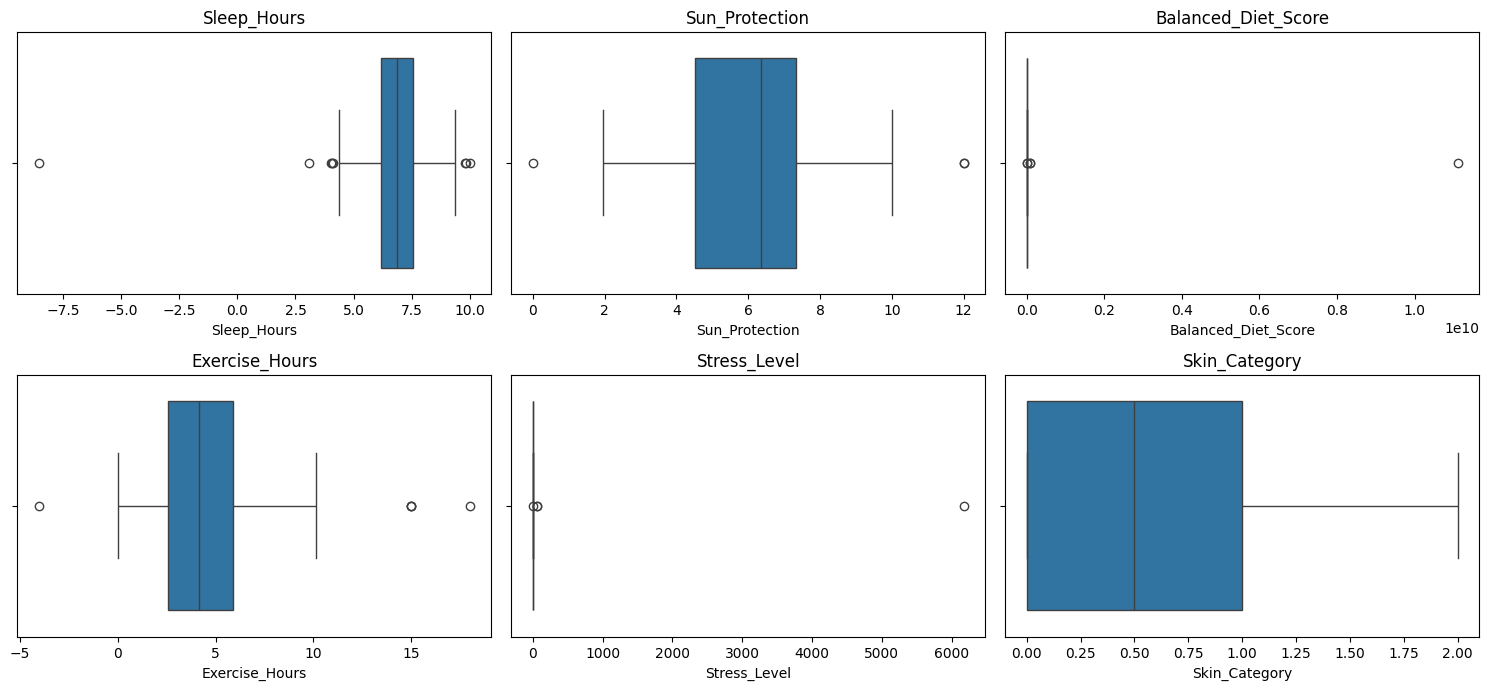

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Handle outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)


**Advanced Imputation (KNNImputer or IterativeImputer)**

In [21]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


**Apply PCA (Keep it even if performance degrades)**

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop('Skin_Category', axis=1)
y = df['Skin_Category']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# You can switch between X_scaled and X_pca
# If PCA degrades score, comment next line:
# X = X_pca


**Try Better Algorithm: XGBoost**

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))


F1 Score: 0.7330246913580246
              precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.79      0.85      0.81        13
         2.0       0.00      0.00      0.00         1

    accuracy                           0.75        24
   macro avg       0.50      0.52      0.50        24
weighted avg       0.72      0.75      0.73        24



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Hyperparameter Tuning (for XGBoost)**

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

grid = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)


Best Params: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score: 0.8524281291463953
